In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import pandas as pd 
import numpy as np  


In [10]:
x,y=make_blobs(n_samples=1000,centers=3,n_features=2,random_state=20)

In [11]:
x.shape

(1000, 2)

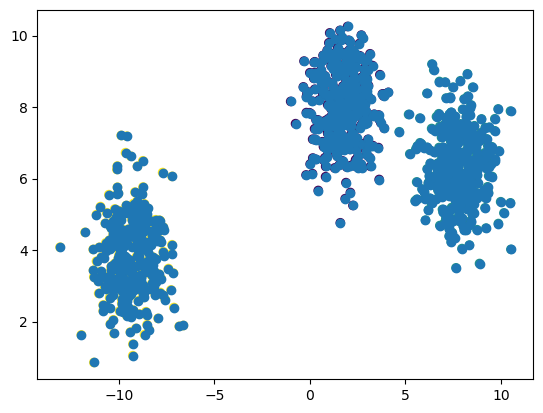

In [14]:
# plt.scatter(x[:, 0], x[:, 1],c=y)
plt.scatter(x[:, 0], x[:, 1])

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)


In [17]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
## finding k value
# Elbow method
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(x_train)
    wcss.append(kmeans.inertia_)

In [19]:
wcss

[45278.057827867095,
 6800.243475520928,
 1563.7439300208798,
 1366.643263408569,
 1174.0805371630324,
 1028.5390152151,
 889.1486854233038,
 781.7146399219646,
 683.9672426815137,
 629.2908626074296]

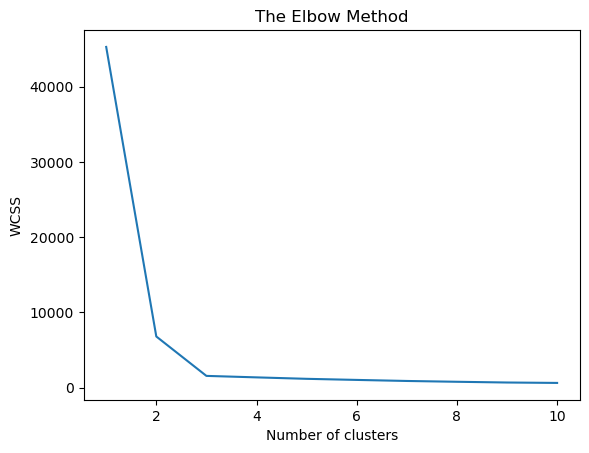

In [20]:
# plot elobw for kmeans
plt.plot(range(1, 11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [22]:
kmeans=KMeans(n_clusters=3, random_state=0)

In [23]:
y_lable=kmeans.fit_predict(x_train)
y_lable

array([1, 0, 2, 2, 2, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 2, 1, 2, 2, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 2, 1, 1, 2, 2, 0, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2,
       0, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 2, 2, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 2, 2, 0, 0, 1, 2, 1, 0, 0, 0, 0, 2, 0, 1, 1, 0, 1,
       2, 0, 1, 0, 1, 0, 1, 0, 2, 0, 0, 1, 2, 1, 0, 1, 0, 1, 1, 2, 0, 0,
       2, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 1, 2, 2, 2, 1, 2, 0, 2, 0, 2, 1, 1, 1, 1, 0, 1, 1, 0,
       2, 0, 0, 0, 0, 1, 0, 1, 2, 2, 2, 0, 1, 0, 0, 0, 2, 0, 2, 2, 0, 2,
       2, 1, 1, 2, 1, 0, 1, 1, 2, 2, 1, 0, 2, 1, 1, 1, 2, 2, 1, 0, 2, 2,
       0, 1, 1, 1, 1, 2, 1, 0, 0, 0, 2, 2, 1, 2, 2, 0, 1, 0, 2, 1, 1, 0,
       2, 1, 0, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 2, 1, 1, 0, 0, 1, 2, 1, 0,
       0, 2, 1, 2, 1, 2, 2, 2, 1, 1, 0, 1, 0, 2, 1, 0, 2, 2, 1, 2, 0, 0,
       1, 2, 1, 0, 1, 2, 0, 1, 0, 0, 1, 1, 2, 1, 1,

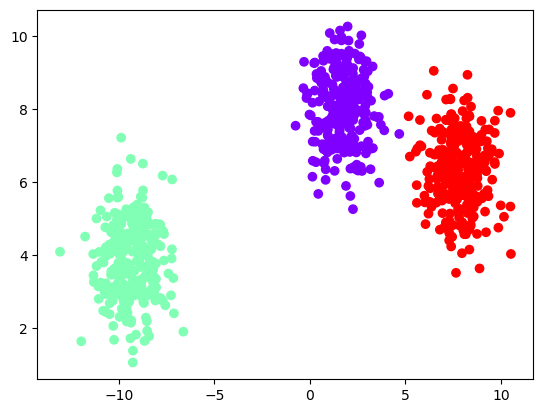

In [24]:
plt.scatter(x_train[:,0], x_train[:,1], c=y_lable, cmap='rainbow')

In [25]:
y_test_label=kmeans.predict(x_test)

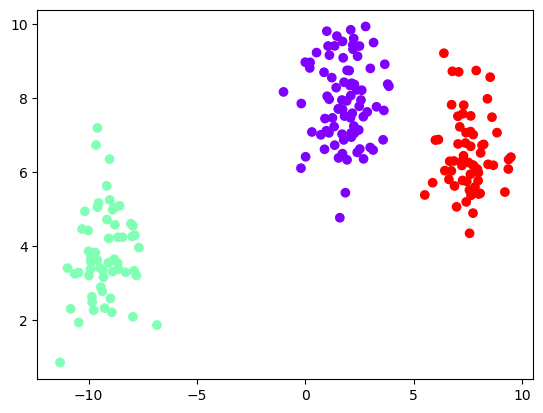

In [26]:
plt.scatter(x_test[:,0], x_test[:,1], c=y_test_label, cmap='rainbow')

# knee locator

In [27]:
!pip install kneed

/Users/prasantpoudel/.zshenv:.:1: no such file or directory: /Users/prasantpoudel/.cargo/env
  Obtaining dependency information for kneed from https://files.pythonhosted.org/packages/9a/1b/7e726d8616e813007874468c61790099ba21493e0ea07561b7d9fc53151c/kneed-0.8.5-py3-none-any.whl.metadata


In [29]:
from kneed import KneeLocator


In [31]:
kl=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')

In [32]:
kl.elbow

3

# silhoutte score


In [39]:
# performance mertrics for kmeans clustering
from sklearn.metrics import silhouette_score

In [44]:
silhouette_coeff=[]
for i in range(2,11):
    kmeans = KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(x_train)
    score=silhouette_score(x_train,kmeans.labels_)
    silhouette_coeff.append(score)

In [45]:
silhouette_coeff

[0.7668310440668489,
 0.7658307823719549,
 0.5904975116995365,
 0.44349779353356583,
 0.333317110509437,
 0.3370112802385565,
 0.3459064026831754,
 0.34824237894977483,
 0.34758791754948004]

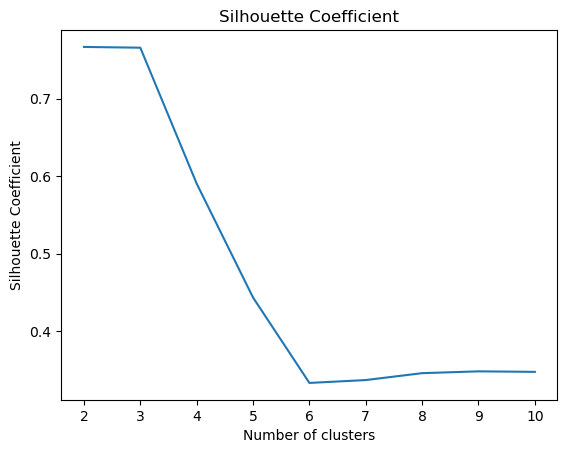

In [46]:
plt.plot(range(2, 11), silhouette_coeff)
plt.title('Silhouette Coefficient')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()
# -1 t0 +1 more toward positive are good